# Load And Structure Data

In [19]:
small_strat_univ = ['BTCUSDT','ETHUSDT','ADAUSDT','BNBUSDT','XRPUSDT','DOTUSDT','MATICUSDT']

large_strat_univ = [
    'BTCUSDT', 'ETHUSDT', 'XRPUSDT', 'BCHUSDT', 'LTCUSDT', 'EOSUSDT', 'BNBUSDT',
    'XLMUSDT', 'TRXUSDT', 'ADAUSDT', 'XTZUSDT', 'LINKUSDT', 'ATOMUSDT',
    'NEOUSDT', 'MKRUSDT', 'DASHUSDT', 'ETCUSDT', 'USDCUSDT', 'ONTUSDT', 'VETUSDT',
    'DOGEUSDT', 'BATUSDT', 'ZECUSDT',
    'SNXUSDT', 'QTUMUSDT', 'TUSDUSDT', 'ZRXUSDT',
    'THXUSDT', 'THRUSDT', 'ALGOUSDT', 'REPUSDT', 'NANOUSDT', 'KBCUSDT', 'BTGUSDT', 'RVNUSDT', 'OMGUSDT',
    'CNXUSDT', 'ABBCUSDT', 'XINUSDT', 'VSYSUSDT', 'SEELEUSDT', 'EONUSDT', 'ZBUSDT', 'EKTUSDT', 'DGBUSDT',
    'BTMUSDT', 'LSKUSDT', 'KMDUSDT', 'SAIUSDT', 'LUNAUSDT', 'KCSUSDT', 'FTTUSDT', 'QNTUSDT', 'SXPUSDT',
    'BDXUSDT', 'GAPUSDT', 'BCDUSDT', 'THETAUSDT', 'ICXUSDT', 'FSTUSDT', 'MATICUSDT', 'SCUSDT', 'EVRUSDT',
    'BTTUSDT', 'MOFUSDT', 'IOSTUSDT', 'MCOUSDT', 'WAVESUSDT', 'XVGUSDT', 'MONAUSDT', 'BTSUSDT', 'BCNUSDT',
    'HCUSDT', 'MAIDUSDT', 'NEXOUSDT', 'ARDRUSDT', 'DXUSDT', 'OKBUSDT', 'FXCUSDT', 'RLCUSDT', 'MBUSDT',
    'BXKUSDT', 'AEUSDT', 'ENJUSDT', 'STEEMUSDT', 'SLVUSDT', 'BRZEUSDT', 'ZILUSDT', 'VESTUSDT', 'ZENUSDT',
    'SOLVEUSDT', 'CHZUSDT', 'NOAHUSDT', 'LAUSDT', 'BTMXUSDT', 'ETNUSDT', 'ENGUSDT', 'ILCUSDT', 'NPXSUSDT',
    'CRPTUSDT', 'GNTUSDT', 'SNTUSDT', 'ELFUSDT', 'JWLUSDT', 'FETUSDT', 'BOTXUSDT', 'NRGUSDT', 'DGDUSDT',
    'EXMRUSDT', 'EURSUSDT', 'AOAUSDT', 'RIFUSDT', 'CIX100USDT', 'BFUSDT', 'XZCUSDT', 'FABUSDT', 'GRINUSDT',
    'NETUSDT', 'VERIUSDT', 'DGTXUSDT', 'KNCUSDT', 'RENUSDT', 'STRATUSDT', 'ETPUSDT', 'NEXUSDT', 'NEWUSDT',
    'BCZEROUSDT', 'GXCUSDT', 'TNTUSDT', 'BTC2USDT', 'PPTUSDT', 'USDKUSDT', 'ELAUSDT', 'IGNISUSDT', 'PLCUSDT',
    'BNKUSDT', 'DTRUSDT', 'RCNUSDT', 'HPTUSDT', 'LAMBUSDT', 'MANAUSDT', 'EDCUSDT', 'BEAMUSDT', 'TTUSDT',
    'AIONUSDT', 'BZUSDT', 'WTCUSDT', 'WICCUSDT', 'LRCUSDT', 'BRDUSDT', 'FCTUSDT', 'NULSUSDT', 'FTMUSDT',
    'IOTXUSDT', 'QBITUSDT', 'XMXUSDT', 'YOUUSDT', 'NASUSDT', 'WAXPUSDT', 'ARKUSDT', 'RDDUSDT', 'GNYUSDT',
    'AGVCUSDT', 'HYNUSDT', 'CVCUSDT', 'WANUSDT', 'WINUSDT', 'LINAUSDT', 'RUSDT', 'PAIUSDT', 'FSNUSDT',
    'FUNUSDT', 'DPTUSDT', 'BHDUSDT', 'LOOMUSDT', 'XACUSDT', 'BUSDUSDT', 'BHPUSDT', 'TRUEUSDT', 'LOKIUSDT',
    'QASHUSDT', 'BNTUSDT', 'DOTUSDT', 'SOLUSDT']

In [20]:
from binance.client import Client as bnb_client
from binance.client import BinanceAPIException
from datetime import datetime
import pandas as pd

client = bnb_client(tld='US')

def get_price_data_for_coin(coin, freq, start_datetime, end_datetime):
    bn_data = client.get_historical_klines(coin, freq, start_datetime, end_datetime)
    columns = ['open_time','open','high','low','close','volume','close_time','quote_volume',
        'num_trades','taker_base_volume','taker_quote_volume','ignore']

    bn_data = pd.DataFrame(bn_data, columns=columns)
    bn_data['open_time'] = bn_data['open_time'].map(lambda x: datetime.utcfromtimestamp(x / 1000))
    bn_data['close_time'] = bn_data['close_time'].map(lambda x: datetime.utcfromtimestamp(x / 1000))
    return bn_data


def get_price_data_for_universe(freq, start_datetime, end_datetime, univ):
    px_data = {}

    for coin in univ:
        try:
            px_data[coin] = get_price_data_for_coin(
                coin, freq, start_datetime, end_datetime).set_index('open_time')
            print(f"Downloaded data for {coin}.")
        except BinanceAPIException:
            print(f"Couldn't load data for {coin}.")
    
    return px_data

In [21]:
data_freq = '1d'
num_day_periods = 1

look_back_window_size = 30 * 6
look_back_min_periods = 10 * 6
start_datetime = '2020-01-01 00:00:00'
end_datetime = '2025-02-20 00:00:00'
min_data_points_to_transact = 5 * 2
out_sample_start_datetime = pd.to_datetime("2023-01-01 00:00:00")

px_large_data_1d = get_price_data_for_universe(data_freq, start_datetime, end_datetime, large_strat_univ)

px_large_close_1d = {coin: px_large_data_1d[coin]["close"] for coin in px_large_data_1d}
px_large_close_1d = pd.DataFrame(px_large_close_1d).astype(float)
px_large_close_1d.index.rename("datetime", inplace=True)

px_large_close_1d

Downloaded data for BTCUSDT.
Downloaded data for ETHUSDT.
Downloaded data for XRPUSDT.
Downloaded data for BCHUSDT.
Downloaded data for LTCUSDT.
Downloaded data for EOSUSDT.
Downloaded data for BNBUSDT.
Downloaded data for XLMUSDT.
Downloaded data for TRXUSDT.
Downloaded data for ADAUSDT.
Downloaded data for XTZUSDT.
Downloaded data for LINKUSDT.
Downloaded data for ATOMUSDT.
Downloaded data for NEOUSDT.
Downloaded data for MKRUSDT.
Downloaded data for DASHUSDT.
Downloaded data for ETCUSDT.
Downloaded data for USDCUSDT.
Downloaded data for ONTUSDT.
Downloaded data for VETUSDT.
Downloaded data for DOGEUSDT.
Downloaded data for BATUSDT.
Downloaded data for ZECUSDT.
Downloaded data for SNXUSDT.
Downloaded data for QTUMUSDT.
Downloaded data for TUSDUSDT.
Downloaded data for ZRXUSDT.
Couldn't load data for THXUSDT.
Couldn't load data for THRUSDT.
Downloaded data for ALGOUSDT.
Couldn't load data for REPUSDT.
Couldn't load data for NANOUSDT.
Couldn't load data for KBCUSDT.
Couldn't load data 

,BTCUSDT,ETHUSDT,XRPUSDT,BCHUSDT,LTCUSDT,EOSUSDT,BNBUSDT,XLMUSDT,TRXUSDT,ADAUSDT,...,MANAUSDT,LRCUSDT,FTMUSDT,IOTXUSDT,WAXPUSDT,LOOMUSDT,BUSDUSDT,BNTUSDT,DOTUSDT,SOLUSDT
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-01,7195.65,130.52,0.19301,204.31,41.53,NaN,13.6954,0.04525,NaN,0.03346,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,6961.80,127.22,0.18762,195.41,39.44,NaN,13.0225,0.04363,NaN,0.03272,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,7345.65,133.95,0.19320,222.70,42.05,NaN,13.6231,0.04566,NaN,0.03403,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,7349.45,134.02,0.19277,224.25,42.58,NaN,13.7944,0.04574,NaN,0.03441,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,7364.19,135.23,0.19462,223.29,43.26,NaN,14.0368,0.04543,NaN,0.03455,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-16,96204.12,2659.08,2.72840,326.00,125.70,0.5852,674.0000,0.34330,NaN,0.77180,...,0.3264,0.1331,0.5195,0.03217,0.03002,0.04700,NaN,0.495,4.870,188.35
2025-02-17,95732.21,2743.12,2.66150,324.90,122.42,0.6611,665.9100,0.33380,NaN,0.80730,...,0.3315,0.1378,0.6172,0.03153,0.03707,0.04700,NaN,0.577,4.843,177.62
2025-02-18,95602.81,2671.26,2.56150,314.90,129.31,0.5825,647.6500,0.32320,NaN,0.75210,...,0.3136,0.1293,0.5867,0.02866,0.03003,0.04663,NaN,0.577,4.745,169.31


In [22]:
data_freq = '12h'
num_day_periods = 2

look_back_window_size = 30 * 6
look_back_min_periods = 10 * 6
start_datetime = '2020-01-01 00:00:00'
end_datetime = '2025-02-20 00:00:00'
min_data_points_to_transact = 5 * 2
out_sample_start_datetime = pd.to_datetime("2023-01-01 00:00:00")

px_large_data_12h = get_price_data_for_universe(data_freq, start_datetime, end_datetime, large_strat_univ)

px_large_close_12h = {coin: px_large_data_12h[coin]["close"] for coin in px_large_data_12h}
px_large_close_12h = pd.DataFrame(px_large_close_12h).astype(float)
px_large_close_12h.index.rename("datetime", inplace=True)

px_large_close_12h

Downloaded data for BTCUSDT.
Downloaded data for ETHUSDT.
Downloaded data for XRPUSDT.
Downloaded data for BCHUSDT.
Downloaded data for LTCUSDT.
Downloaded data for EOSUSDT.
Downloaded data for BNBUSDT.
Downloaded data for XLMUSDT.
Downloaded data for TRXUSDT.
Downloaded data for ADAUSDT.
Downloaded data for XTZUSDT.
Downloaded data for LINKUSDT.
Downloaded data for ATOMUSDT.
Downloaded data for NEOUSDT.
Downloaded data for MKRUSDT.
Downloaded data for DASHUSDT.
Downloaded data for ETCUSDT.
Downloaded data for USDCUSDT.
Downloaded data for ONTUSDT.
Downloaded data for VETUSDT.
Downloaded data for DOGEUSDT.
Downloaded data for BATUSDT.
Downloaded data for ZECUSDT.
Downloaded data for SNXUSDT.
Downloaded data for QTUMUSDT.
Downloaded data for TUSDUSDT.
Downloaded data for ZRXUSDT.
Couldn't load data for THXUSDT.
Couldn't load data for THRUSDT.
Downloaded data for ALGOUSDT.
Couldn't load data for REPUSDT.
Couldn't load data for NANOUSDT.
Couldn't load data for KBCUSDT.
Couldn't load data 

,BTCUSDT,ETHUSDT,XRPUSDT,BCHUSDT,LTCUSDT,EOSUSDT,BNBUSDT,XLMUSDT,TRXUSDT,ADAUSDT,...,MANAUSDT,LRCUSDT,FTMUSDT,IOTXUSDT,WAXPUSDT,LOOMUSDT,BUSDUSDT,BNTUSDT,DOTUSDT,SOLUSDT
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,7195.80,130.84,0.19358,205.61,41.67,NaN,13.7162,0.04509,NaN,0.03321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 12:00:00,7195.65,130.52,0.19301,204.31,41.53,NaN,13.6954,0.04525,NaN,0.03346,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02 00:00:00,7160.41,130.00,0.19242,203.52,41.35,NaN,13.5094,0.04505,NaN,0.03329,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02 12:00:00,6961.80,127.22,0.18762,195.41,39.44,NaN,13.0225,0.04363,NaN,0.03272,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03 00:00:00,7340.16,132.50,0.19316,213.47,41.67,NaN,13.6304,0.04535,NaN,0.03418,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-18 00:00:00,95601.54,2681.19,2.57330,317.20,125.29,0.6003,655.7400,0.32440,NaN,0.77310,...,0.3184,0.1304,0.5973,0.03153,0.03707,0.04700,NaN,0.577,4.769,168.82
2025-02-18 12:00:00,95602.81,2671.26,2.56150,314.90,129.31,0.5825,647.6500,0.32320,NaN,0.75210,...,0.3136,0.1293,0.5867,0.02866,0.03003,0.04663,NaN,0.577,4.745,169.31
2025-02-19 00:00:00,96362.91,2727.25,2.61210,324.00,135.82,0.5837,659.1600,0.33780,NaN,0.77540,...,0.3112,0.1309,0.6800,0.02878,0.03400,0.04663,NaN,0.577,4.815,173.86


# Define Functions For Picking Coins And Setting Holdings

Coins can be in multiple triples of correlated coins.

In [23]:
import numpy as np
import statsmodels.api as sm
from enum import Enum

class TopCorrSelectionMethod(Enum):
    MAX_CORR = 1
    MIN_CORR = 2


def get_multiple_triples_newly_uncorrelated_keys(
    current_correlated_triples,
    price_indicator_window_df,
    corr_matrix,
    rejection_max_corr):
    
    newly_uncorrelated_keys = set()
    for key in current_correlated_triples:
        coin_1, coin_2, coin_3 = key
        
        if price_indicator_window_df[list(key)].iloc[-1].isnull().any():
            newly_uncorrelated_keys.add(key)
        elif (corr_matrix.loc[coin_1, coin_2] < rejection_max_corr or \
              corr_matrix.loc[coin_1, coin_3] < rejection_max_corr):
            newly_uncorrelated_keys.add(key)
    return newly_uncorrelated_keys


def trim_current_correlated_triples(
    current_correlated_triples,
    corr_matrix,
    top_corr_selection_method,
    num_triples_to_keep):
    if len(current_correlated_triples) <= 20:
        return
    
    corr_scores_of_triples = []
    for (coin_1, coin_2, coin_3) in current_correlated_triples:
        score = 0.0
        if top_corr_selection_method == TopCorrSelectionMethod.MAX_CORR:
            score = max(corr_matrix[coin_1][coin_2], corr_matrix[coin_1][coin_3])
        if top_corr_selection_method == TopCorrSelectionMethod.MIN_CORR:
            score = min(corr_matrix[coin_1][coin_2], corr_matrix[coin_1][coin_3])
        corr_scores_of_triples.append((score, (coin_1, coin_2, coin_3)))
    corr_scores_of_triples.sort()
    
    triples_to_remove = set(map(lambda x: x[1], corr_scores_of_triples[:-(num_triples_to_keep)]))
    for triple in triples_to_remove:
        del current_correlated_triples[triple]


def update_multiple_triples_correlated_coins(
    coin,
    corr_matrix,
    current_correlated_triples,
    price_indicator_window_df,
    secondary_coin_min_corr,
    tertiary_coin_max_corr,
    top_corr_selection_method,
    num_triples_to_keep):

    high_corr_coins = []
    for other_coin, other_coin_value in corr_matrix[coin][corr_matrix[coin] > secondary_coin_min_corr].items():
        if other_coin == coin:
            continue
        if np.isnan(price_indicator_window_df[other_coin]).any():
            continue
        high_corr_coins.append(other_coin)
    
    if len(high_corr_coins) == 0:
        return
    
    for index in range(len(high_corr_coins)):
        for other_index in range(index+1, len(high_corr_coins)):
            correlated_coin_1 = high_corr_coins[index]
            correlated_coin_2 = high_corr_coins[other_index]
            key = (coin, min(correlated_coin_1, correlated_coin_2), max(correlated_coin_1, correlated_coin_2))
            if (corr_matrix.loc[correlated_coin_1, correlated_coin_2] < tertiary_coin_max_corr) and \
                (key not in current_correlated_triples):
                current_correlated_triples[key] = pd.DataFrame(
                    0.0, columns=[
                        min(correlated_coin_1, correlated_coin_2),
                        max(correlated_coin_1, correlated_coin_2),
                        'alpha',
                        'residual'
                    ], index=[])
    
    trim_current_correlated_triples(current_correlated_triples, corr_matrix, top_corr_selection_method,
                                    num_triples_to_keep)


def update_multiple_triples_correlated_triples(
    current_correlated_triples,
    corr_matrix,
    price_indicator_window_df,
    secondary_coin_min_corr,
    tertiary_coin_max_corr,
    top_corr_selection_method,
    num_triples_to_keep):
    for coin in list(price_indicator_window_df.columns):
        if np.isnan(price_indicator_window_df[coin]).any():
            continue
        update_multiple_triples_correlated_coins(
            coin,
            corr_matrix,
            current_correlated_triples,
            price_indicator_window_df,
            secondary_coin_min_corr,
            tertiary_coin_max_corr,
            top_corr_selection_method,
            num_triples_to_keep
        )


def set_multiple_triples_time_holdings(
    holdings_df,
    time_index,
    price_indicator_window_df,
    current_correlated_triples,
    min_data_points_to_transact,
    look_back_window_size,
    z_score_min_threshold,
    z_score_max_threshold):
    
    for (coin, corr_coin_1, corr_coin_2) in current_correlated_triples:
        model = sm.OLS(
            price_indicator_window_df[coin].iloc[:-1],
            sm.add_constant(price_indicator_window_df[[corr_coin_1, corr_coin_2]].iloc[:-1])
        )
        result = model.fit()
        result_data = {
            corr_coin_1: result.params[corr_coin_1],
            corr_coin_2: result.params[corr_coin_2],
            'alpha': result.params['const']
        }
        
        estimate = model.predict(
            result.params,
            sm.add_constant(price_indicator_window_df[[corr_coin_1, corr_coin_2]]).iloc[-1]
        )
        
        result_data['residual'] = price_indicator_window_df[coin].iloc[-1] - estimate
        result_series = pd.Series(result_data)
        current_correlated_triples[(coin, corr_coin_1, corr_coin_2)].loc[time_index] = result_series
        
        if len(current_correlated_triples[(coin, corr_coin_1, corr_coin_2)]) >= min_data_points_to_transact:
            z_score_look_back_len = min(
                look_back_window_size,
                len(current_correlated_triples[(coin, corr_coin_1, corr_coin_2)])
            )
            look_back_coin_regression_data = current_correlated_triples[
                (coin, corr_coin_1, corr_coin_2)].iloc[(-z_score_look_back_len):]
            residual_mean = look_back_coin_regression_data['residual'].mean()
            residual_std = look_back_coin_regression_data['residual'].std()
            z_score = (result_data['residual'] - residual_mean) / residual_std
            
            total_holding = 1.0 + abs(result_data[corr_coin_1]) + abs(result_data[corr_coin_2])
            if z_score_min_threshold <= z_score <= z_score_max_threshold:
                holdings_df.loc[time_index, coin] -= (1.0 / total_holding)
                holdings_df.loc[time_index, corr_coin_1] += (result_data[corr_coin_1] / total_holding)
                holdings_df.loc[time_index, corr_coin_2] += (result_data[corr_coin_2] / total_holding)
            elif -z_score_max_threshold <= z_score <= -z_score_min_threshold:
                holdings_df.loc[time_index, coin] += (1.0 / total_holding)
                holdings_df.loc[time_index, corr_coin_1] -= (result_data[corr_coin_1] / total_holding)
                holdings_df.loc[time_index, corr_coin_2] -= (result_data[corr_coin_2] / total_holding)
    holdings_df.loc[time_index] = holdings_df.loc[time_index] / holdings_df.loc[time_index].abs().sum()


def get_holdings_multiple_triples_df(
    price_indicator_df,
    look_back_min_periods,
    look_back_window_size,
    secondary_coin_min_corr,
    tertiary_coin_max_corr,
    rejection_max_corr,
    min_data_points_to_transact,
    z_score_min_threshold,
    z_score_max_threshold,
    top_corr_selection_method,
    num_triples_to_keep):
    
    holdings_df = pd.DataFrame(0.0, columns=price_indicator_df.columns, index=price_indicator_df.index)
    
    current_correlated_triples = dict()
    
    for index in range(look_back_min_periods, len(holdings_df)):
        window_start = max(index-look_back_window_size, 0)
        
        # exclude the data from the current index itself to avoid having to shift forward strategy holdings
        # later when calculating returns to avoid look-ahead bias
        price_indicator_window_df = price_indicator_df.iloc[window_start:index]
        
        time_index = price_indicator_df.index[index]
        
        print("\n\n\n")
        print(time_index)
        print("\n\n\n")
        
        holdings_df.loc[time_index] = pd.Series(0.0, index=holdings_df.columns)
        
        corr_matrix = price_indicator_window_df.corr()
        
        newly_uncorrelated_keys = get_multiple_triples_newly_uncorrelated_keys(
            current_correlated_triples,
            price_indicator_window_df,
            corr_matrix,
            rejection_max_corr)
        
        # update coins_in_a_triple and current_correlated_triples in-place
        for key in newly_uncorrelated_keys:
            del current_correlated_triples[key]
        
        print("\n")
        print('\n'.join([str(k) for k in current_correlated_triples.keys()]))
        print("\n")

        update_multiple_triples_correlated_triples(
            current_correlated_triples,
            corr_matrix,
            price_indicator_window_df,
            secondary_coin_min_corr,
            tertiary_coin_max_corr,
            top_corr_selection_method,
            num_triples_to_keep)
        
        set_multiple_triples_time_holdings(
            holdings_df,
            time_index,
            price_indicator_window_df,
            current_correlated_triples,
            min_data_points_to_transact,
            look_back_window_size,
            z_score_min_threshold,
            z_score_max_threshold)

    return holdings_df

# Define Functions For Evaluation

In [24]:
def get_net_return(strat_holdings, ret):
    # assume that strat_holdings have already been shifted back in time to avoid look-ahead bias or that
    # data does not depend on current time point
    gross_ret = (strat_holdings * ret).sum(axis=1)
    
    turnover = (strat_holdings.fillna(0) - strat_holdings.shift().fillna(0)).abs().sum(axis=1)
    tcost_bps = 20
    return gross_ret.subtract(turnover * tcost_bps * 1e-4, fill_value=0)

Calculate the sharpe ratio of the net returns for both the in-sample period and the out-sample period.

In [25]:
def get_sharpe_ratio_data(net_returns_ser):
    sr_data = dict()
    periods_in_day = net_returns_ser.groupby(lambda idx: idx.date()).count().max().max()
    sr_data["total sr"] = net_returns_ser.mean() / net_returns_ser.std() * np.sqrt(365 * periods_in_day)
    
    out_sample_start = pd.to_datetime(out_sample_start_datetime)
    in_sample_end = out_sample_start - pd.Timedelta(hours=4)
    
    sr_data["in-sample sr"] = net_returns_ser.loc[:in_sample_end].mean() / net_returns_ser.loc[:in_sample_end].std() * np.sqrt(365 * periods_in_day)
    sr_data["out-sample sr"] = net_returns_ser.loc[out_sample_start:].mean() / net_returns_ser.loc[out_sample_start:].std() * np.sqrt(365 * periods_in_day)
    sr_series = pd.Series(sr_data)
    return sr_series

# Evaluate Different Sets Of Parameters

Keep top 20 triples keyed by max of correlation of second and third coins to first coin.

In [ ]:
price_large_close_returns_1d = (px_large_close_1d / px_large_close_1d.shift() - 1)

secondary_coin_min_corr = 0.7
tertiary_coin_max_corr = 0.6
rejection_max_corr = 0.5

z_score_min_threshold = 2.0
z_score_max_threshold = 10.0

min_data_points_to_transact = 5 * 2
num_triples_to_keep = 20

large_holdings_df_from_price_1d = get_holdings_multiple_triples_df(
    price_large_close_returns_1d,
    look_back_min_periods,
    look_back_window_size,
    secondary_coin_min_corr,
    tertiary_coin_max_corr,
    rejection_max_corr,
    min_data_points_to_transact,
    z_score_min_threshold,
    z_score_max_threshold,
    TopCorrSelectionMethod.MAX_CORR,
    num_triples_to_keep
)

total sr        -0.641975
in-sample sr    -0.570565
out-sample sr   -0.786559
dtype: float64

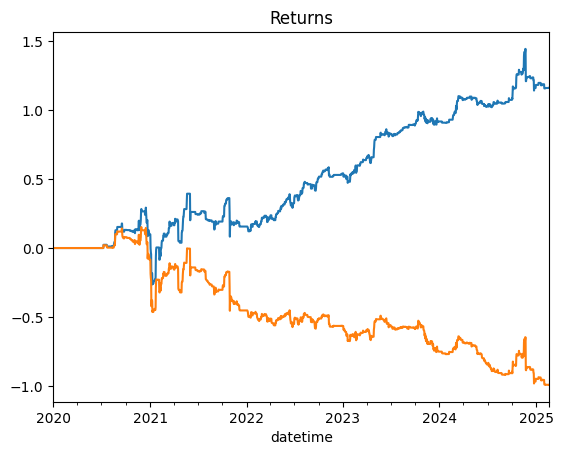

In [32]:
net_large_returns_ser_1d = get_net_return(large_holdings_df_from_price_1d, price_large_close_returns_1d)
sharpe_ratio_large_ser_1d = get_sharpe_ratio_data(net_large_returns_ser_1d)

(large_holdings_df_from_price_1d * price_large_close_returns_1d).sum(axis=1).cumsum().plot(title="Returns")
net_large_returns_ser_1d.cumsum().plot(title="Returns")
sharpe_ratio_large_ser_1d

Keep top 20 triples keyed by min of correlation of second and third coins to first coin.

In [ ]:
price_large_close_returns_1d = (px_large_close_1d / px_large_close_1d.shift() - 1)

secondary_coin_min_corr = 0.7
tertiary_coin_max_corr = 0.6
rejection_max_corr = 0.5

z_score_min_threshold = 2.0
z_score_max_threshold = 10.0

min_data_points_to_transact = 5 * 2
num_triples_to_keep = 20

large_holdings_df_from_price_1d = get_holdings_multiple_triples_df(
    price_large_close_returns_1d,
    look_back_min_periods,
    look_back_window_size,
    secondary_coin_min_corr,
    tertiary_coin_max_corr,
    rejection_max_corr,
    min_data_points_to_transact,
    z_score_min_threshold,
    z_score_max_threshold,
    TopCorrSelectionMethod.MIN_CORR,
    num_triples_to_keep
)

total sr        -0.654662
in-sample sr    -0.962324
out-sample sr   -0.054333
dtype: float64

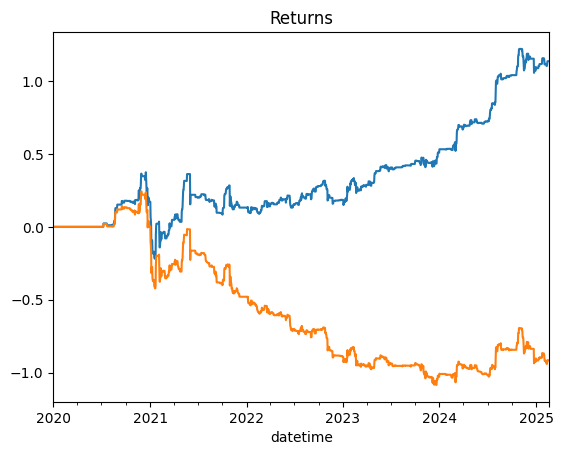

In [40]:
net_large_returns_ser_1d = get_net_return(large_holdings_df_from_price_1d, price_large_close_returns_1d)
sharpe_ratio_large_ser_1d = get_sharpe_ratio_data(net_large_returns_ser_1d)

(large_holdings_df_from_price_1d * price_large_close_returns_1d).sum(axis=1).cumsum().plot(title="Returns")
net_large_returns_ser_1d.cumsum().plot(title="Returns")
sharpe_ratio_large_ser_1d

Keep top 20 triples keyed by max corr, z-score threshold = 3.0

In [ ]:
price_large_close_returns_1d = (px_large_close_1d / px_large_close_1d.shift() - 1)

secondary_coin_min_corr = 0.7
tertiary_coin_max_corr = 0.6
rejection_max_corr = 0.5

z_score_min_threshold = 3.0
z_score_max_threshold = 10.0

min_data_points_to_transact = 5 * 2
num_triples_to_keep = 20
corr_selection_method = TopCorrSelectionMethod.MAX_CORR

large_holdings_df_from_price_1d = get_holdings_multiple_triples_df(
    price_large_close_returns_1d,
    look_back_min_periods,
    look_back_window_size,
    secondary_coin_min_corr,
    tertiary_coin_max_corr,
    rejection_max_corr,
    min_data_points_to_transact,
    z_score_min_threshold,
    z_score_max_threshold,
    corr_selection_method,
    num_triples_to_keep
)

total sr         0.620168
in-sample sr     0.745287
out-sample sr    0.383458
dtype: float64

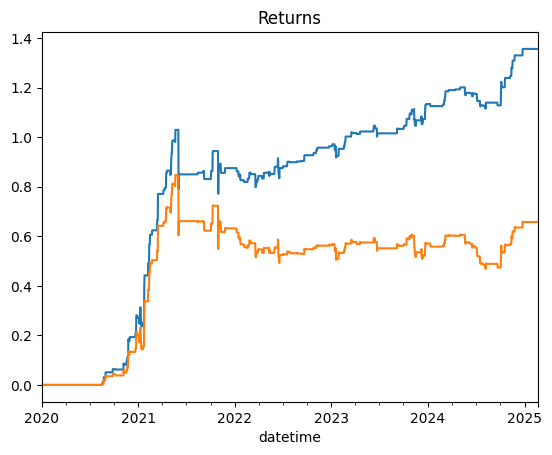

In [38]:
net_large_returns_ser_1d = get_net_return(large_holdings_df_from_price_1d, price_large_close_returns_1d)
sharpe_ratio_large_ser_1d = get_sharpe_ratio_data(net_large_returns_ser_1d)

(large_holdings_df_from_price_1d * price_large_close_returns_1d).sum(axis=1).cumsum().plot(title="Returns")
net_large_returns_ser_1d.cumsum().plot(title="Returns")
sharpe_ratio_large_ser_1d

Keep top 20 triples keyed by min corr, z-score threshold = 3.0

In [ ]:
price_large_close_returns_1d = (px_large_close_1d / px_large_close_1d.shift() - 1)

secondary_coin_min_corr = 0.7
tertiary_coin_max_corr = 0.6
rejection_max_corr = 0.5

z_score_min_threshold = 3.0
z_score_max_threshold = 10.0

min_data_points_to_transact = 5 * 2
num_triples_to_keep = 20

large_holdings_df_from_price_1d = get_holdings_multiple_triples_df(
    price_large_close_returns_1d,
    look_back_min_periods,
    look_back_window_size,
    secondary_coin_min_corr,
    tertiary_coin_max_corr,
    rejection_max_corr,
    min_data_points_to_transact,
    z_score_min_threshold,
    z_score_max_threshold,
    TopCorrSelectionMethod.MIN_CORR,
    num_triples_to_keep
)

total sr         0.434339
in-sample sr     0.382458
out-sample sr    0.642580
dtype: float64

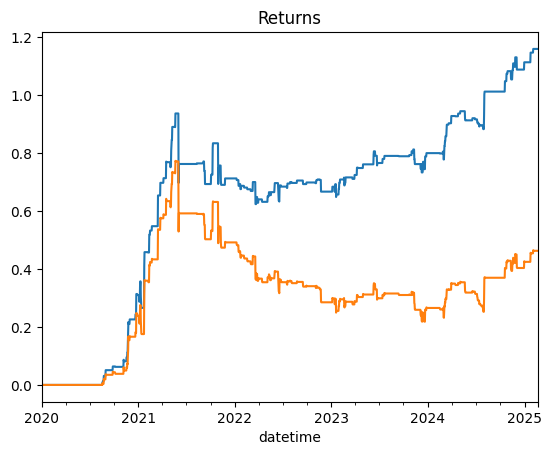

In [38]:
net_large_returns_ser_1d = get_net_return(large_holdings_df_from_price_1d, price_large_close_returns_1d)
sharpe_ratio_large_ser_1d = get_sharpe_ratio_data(net_large_returns_ser_1d)

(large_holdings_df_from_price_1d * price_large_close_returns_1d).sum(axis=1).cumsum().plot(title="Returns")
net_large_returns_ser_1d.cumsum().plot(title="Returns")
sharpe_ratio_large_ser_1d

Limit to top 20 correlated, key = MAX, 12h frequency, z-score threshold = 3.0

In [ ]:
# px_large_close_12h

price_large_close_returns_12h = (px_large_close_12h / px_large_close_12h.shift() - 1)

secondary_coin_min_corr = 0.7
tertiary_coin_max_corr = 0.6
rejection_max_corr = 0.5

z_score_min_threshold = 3.0
z_score_max_threshold = 10.0

min_data_points_to_transact = 5 * 2
num_triples_to_keep = 20

large_holdings_df_from_price_12h = get_holdings_multiple_triples_df(
    price_large_close_returns_12h,
    look_back_min_periods,
    look_back_window_size,
    secondary_coin_min_corr,
    tertiary_coin_max_corr,
    rejection_max_corr,
    min_data_points_to_transact,
    z_score_min_threshold,
    z_score_max_threshold,
    TopCorrSelectionMethod.MAX_CORR,
    num_triples_to_keep
)

total sr        -0.922207
in-sample sr    -1.409308
out-sample sr   -0.027842
dtype: float64

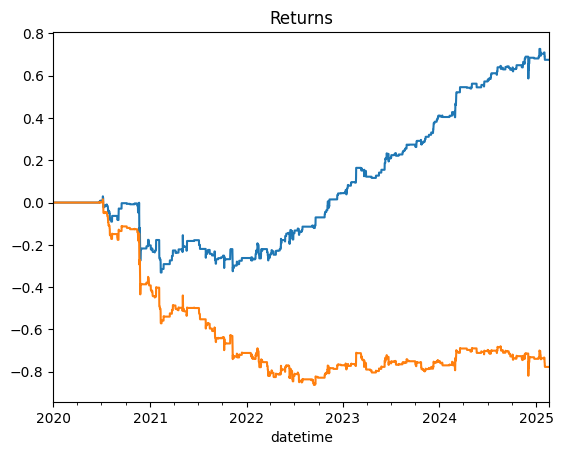

In [43]:
net_large_returns_ser_12h = get_net_return(large_holdings_df_from_price_12h, price_large_close_returns_12h)
sharpe_ratio_large_ser_12h = get_sharpe_ratio_data(net_large_returns_ser_12h)

(large_holdings_df_from_price_12h * price_large_close_returns_12h).sum(axis=1).cumsum().plot(title="Returns")
net_large_returns_ser_12h.cumsum().plot(title="Returns")
sharpe_ratio_large_ser_12h

Keep top 30 triples keyed by max of correlation of second and third coins to first coin.

In [ ]:
price_large_close_returns_1d = (px_large_close_1d / px_large_close_1d.shift() - 1)

secondary_coin_min_corr = 0.7
tertiary_coin_max_corr = 0.6
rejection_max_corr = 0.5

z_score_min_threshold = 3.0
z_score_max_threshold = 10.0

min_data_points_to_transact = 5 * 2
num_triples_to_keep = 30
corr_selection_method = TopCorrSelectionMethod.MAX_CORR

large_holdings_df_from_price_1d = get_holdings_multiple_triples_df(
    price_large_close_returns_1d,
    look_back_min_periods,
    look_back_window_size,
    secondary_coin_min_corr,
    tertiary_coin_max_corr,
    rejection_max_corr,
    min_data_points_to_transact,
    z_score_min_threshold,
    z_score_max_threshold,
    corr_selection_method,
    num_triples_to_keep
)

total sr         0.730078
in-sample sr     0.408145
out-sample sr    1.395671
dtype: float64

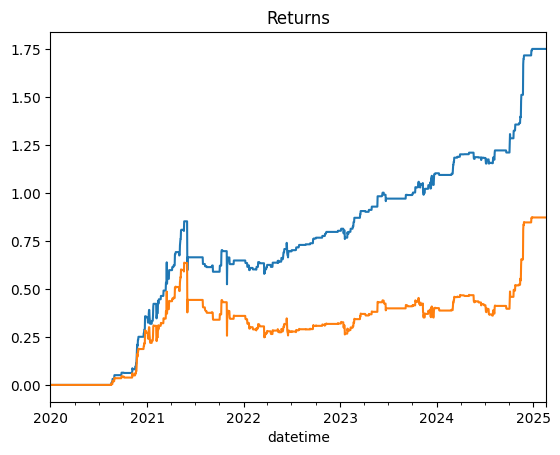

In [18]:
net_large_returns_ser_1d = get_net_return(large_holdings_df_from_price_1d, price_large_close_returns_1d)
sharpe_ratio_large_ser_1d = get_sharpe_ratio_data(net_large_returns_ser_1d)

(large_holdings_df_from_price_1d * price_large_close_returns_1d).sum(axis=1).cumsum().plot(title="Returns")
net_large_returns_ser_1d.cumsum().plot(title="Returns")
sharpe_ratio_large_ser_1d

Keep top 30 triples keyed by min of correlation of second and third coins to first coin.

In [ ]:
price_large_close_returns_1d = (px_large_close_1d / px_large_close_1d.shift() - 1)

secondary_coin_min_corr = 0.7
tertiary_coin_max_corr = 0.6
rejection_max_corr = 0.5

z_score_min_threshold = 3.0
z_score_max_threshold = 10.0

min_data_points_to_transact = 5 * 2
num_triples_to_keep = 30
corr_selection_method = TopCorrSelectionMethod.MIN_CORR

large_holdings_df_from_price_1d = get_holdings_multiple_triples_df(
    price_large_close_returns_1d,
    look_back_min_periods,
    look_back_window_size,
    secondary_coin_min_corr,
    tertiary_coin_max_corr,
    rejection_max_corr,
    min_data_points_to_transact,
    z_score_min_threshold,
    z_score_max_threshold,
    corr_selection_method,
    num_triples_to_keep
)

total sr         0.497132
in-sample sr     0.488687
out-sample sr    0.575800
dtype: float64

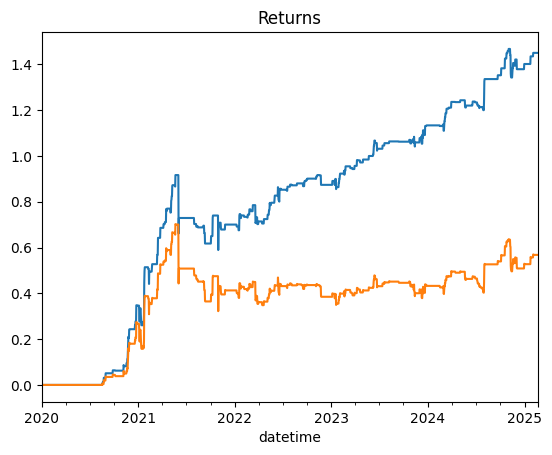

In [27]:
net_large_returns_ser_1d = get_net_return(large_holdings_df_from_price_1d, price_large_close_returns_1d)
sharpe_ratio_large_ser_1d = get_sharpe_ratio_data(net_large_returns_ser_1d)

(large_holdings_df_from_price_1d * price_large_close_returns_1d).sum(axis=1).cumsum().plot(title="Returns")
net_large_returns_ser_1d.cumsum().plot(title="Returns")
sharpe_ratio_large_ser_1d

Keep top 30 triples, key = MAX, z-score threshold = 2.0.

In [ ]:
price_large_close_returns_1d = (px_large_close_1d / px_large_close_1d.shift() - 1)

secondary_coin_min_corr = 0.7
tertiary_coin_max_corr = 0.6
rejection_max_corr = 0.5

z_score_min_threshold = 2.0
z_score_max_threshold = 10.0

min_data_points_to_transact = 5 * 2
num_triples_to_keep = 30
corr_selection_method = TopCorrSelectionMethod.MAX_CORR

large_holdings_df_from_price_1d = get_holdings_multiple_triples_df(
    price_large_close_returns_1d,
    look_back_min_periods,
    look_back_window_size,
    secondary_coin_min_corr,
    tertiary_coin_max_corr,
    rejection_max_corr,
    min_data_points_to_transact,
    z_score_min_threshold,
    z_score_max_threshold,
    corr_selection_method,
    num_triples_to_keep
)

total sr        -0.358343
in-sample sr    -0.428886
out-sample sr   -0.248758
dtype: float64

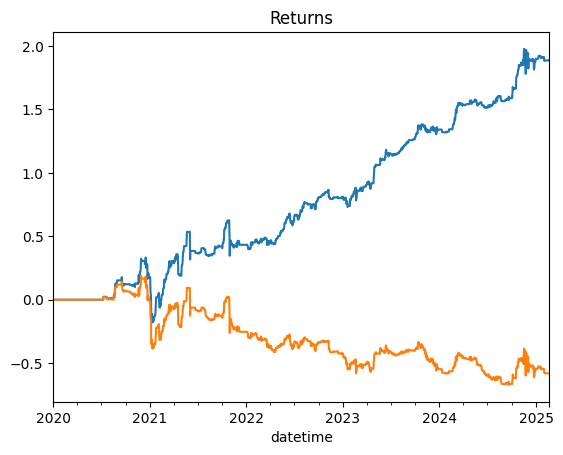

In [29]:
net_large_returns_ser_1d = get_net_return(large_holdings_df_from_price_1d, price_large_close_returns_1d)
sharpe_ratio_large_ser_1d = get_sharpe_ratio_data(net_large_returns_ser_1d)

(large_holdings_df_from_price_1d * price_large_close_returns_1d).sum(axis=1).cumsum().plot(title="Returns")
net_large_returns_ser_1d.cumsum().plot(title="Returns")
sharpe_ratio_large_ser_1d

Keep top 30 triples, key = MAX, z-score threshold = 2.5.

In [ ]:
price_large_close_returns_1d = (px_large_close_1d / px_large_close_1d.shift() - 1)

secondary_coin_min_corr = 0.7
tertiary_coin_max_corr = 0.6
rejection_max_corr = 0.5

z_score_min_threshold = 2.5
z_score_max_threshold = 10.0

min_data_points_to_transact = 5 * 2
num_triples_to_keep = 30
corr_selection_method = TopCorrSelectionMethod.MAX_CORR

large_holdings_df_from_price_1d = get_holdings_multiple_triples_df(
    price_large_close_returns_1d,
    look_back_min_periods,
    look_back_window_size,
    secondary_coin_min_corr,
    tertiary_coin_max_corr,
    rejection_max_corr,
    min_data_points_to_transact,
    z_score_min_threshold,
    z_score_max_threshold,
    corr_selection_method,
    num_triples_to_keep
)

total sr         0.533168
in-sample sr     0.558614
out-sample sr    0.495413
dtype: float64

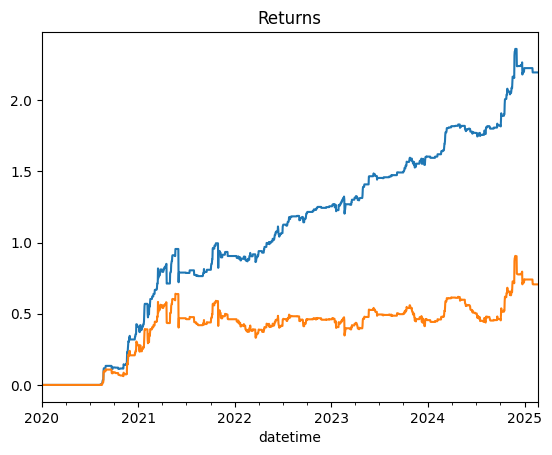

In [31]:
net_large_returns_ser_1d = get_net_return(large_holdings_df_from_price_1d, price_large_close_returns_1d)
sharpe_ratio_large_ser_1d = get_sharpe_ratio_data(net_large_returns_ser_1d)

(large_holdings_df_from_price_1d * price_large_close_returns_1d).sum(axis=1).cumsum().plot(title="Returns")
net_large_returns_ser_1d.cumsum().plot(title="Returns")
sharpe_ratio_large_ser_1d

Keep top 40 triples, key = MAX, z-score threshold = 3.0.

In [ ]:
price_large_close_returns_1d = (px_large_close_1d / px_large_close_1d.shift() - 1)

secondary_coin_min_corr = 0.7
tertiary_coin_max_corr = 0.6
rejection_max_corr = 0.5

z_score_min_threshold = 3.0
z_score_max_threshold = 10.0

min_data_points_to_transact = 5 * 2
num_triples_to_keep = 40
corr_selection_method = TopCorrSelectionMethod.MAX_CORR

large_holdings_df_from_price_1d = get_holdings_multiple_triples_df(
    price_large_close_returns_1d,
    look_back_min_periods,
    look_back_window_size,
    secondary_coin_min_corr,
    tertiary_coin_max_corr,
    rejection_max_corr,
    min_data_points_to_transact,
    z_score_min_threshold,
    z_score_max_threshold,
    corr_selection_method,
    num_triples_to_keep
)

total sr         0.610441
in-sample sr     0.271467
out-sample sr    1.214368
dtype: float64

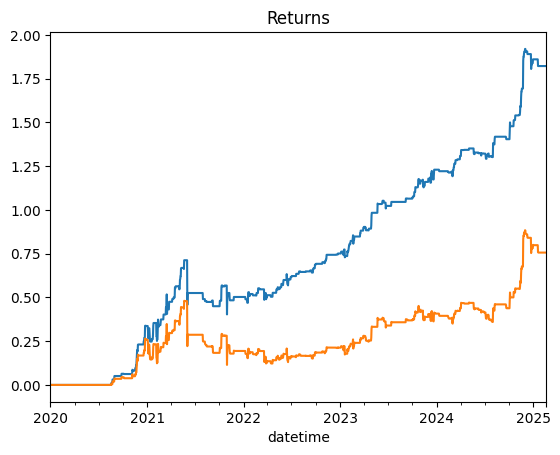

In [34]:
net_large_returns_ser_1d = get_net_return(large_holdings_df_from_price_1d, price_large_close_returns_1d)
sharpe_ratio_large_ser_1d = get_sharpe_ratio_data(net_large_returns_ser_1d)

(large_holdings_df_from_price_1d * price_large_close_returns_1d).sum(axis=1).cumsum().plot(title="Returns")
net_large_returns_ser_1d.cumsum().plot(title="Returns")
sharpe_ratio_large_ser_1d

Keep top 30 triples, key = MAX, z-score threshold = 3.5.

In [ ]:
price_large_close_returns_1d = (px_large_close_1d / px_large_close_1d.shift() - 1)

secondary_coin_min_corr = 0.7
tertiary_coin_max_corr = 0.6
rejection_max_corr = 0.5

z_score_min_threshold = 3.5
z_score_max_threshold = 10.0

min_data_points_to_transact = 5 * 2
num_triples_to_keep = 30
corr_selection_method = TopCorrSelectionMethod.MAX_CORR

large_holdings_df_from_price_1d = get_holdings_multiple_triples_df(
    price_large_close_returns_1d,
    look_back_min_periods,
    look_back_window_size,
    secondary_coin_min_corr,
    tertiary_coin_max_corr,
    rejection_max_corr,
    min_data_points_to_transact,
    z_score_min_threshold,
    z_score_max_threshold,
    corr_selection_method,
    num_triples_to_keep
)

total sr         0.999553
in-sample sr     0.677178
out-sample sr    1.688652
dtype: float64

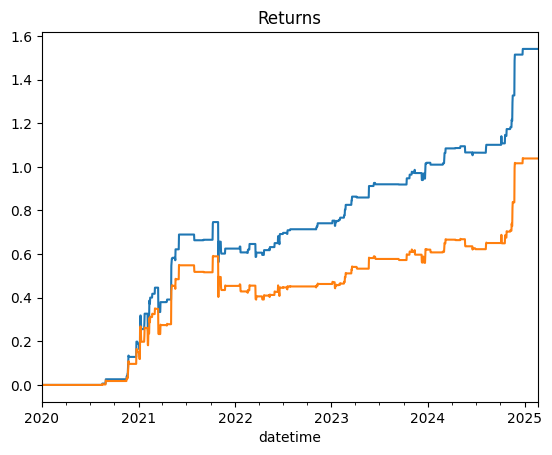

In [36]:
net_large_returns_ser_1d = get_net_return(large_holdings_df_from_price_1d, price_large_close_returns_1d)
sharpe_ratio_large_ser_1d = get_sharpe_ratio_data(net_large_returns_ser_1d)

(large_holdings_df_from_price_1d * price_large_close_returns_1d).sum(axis=1).cumsum().plot(title="Returns")
net_large_returns_ser_1d.cumsum().plot(title="Returns")
sharpe_ratio_large_ser_1d

Freq=1d, keep top 40 triples, key = MIN, z-score threshold = 3.0.

In [ ]:
price_large_close_returns_1d = (px_large_close_1d / px_large_close_1d.shift() - 1)

secondary_coin_min_corr = 0.7
tertiary_coin_max_corr = 0.6
rejection_max_corr = 0.5

z_score_min_threshold = 3.0
z_score_max_threshold = 10.0

min_data_points_to_transact = 5 * 2
num_triples_to_keep = 40
corr_selection_method = TopCorrSelectionMethod.MIN_CORR

large_holdings_df_from_price_1d = get_holdings_multiple_triples_df(
    price_large_close_returns_1d,
    look_back_min_periods,
    look_back_window_size,
    secondary_coin_min_corr,
    tertiary_coin_max_corr,
    rejection_max_corr,
    min_data_points_to_transact,
    z_score_min_threshold,
    z_score_max_threshold,
    corr_selection_method,
    num_triples_to_keep
)

total sr         0.054773
in-sample sr    -0.003108
out-sample sr    0.168707
dtype: float64

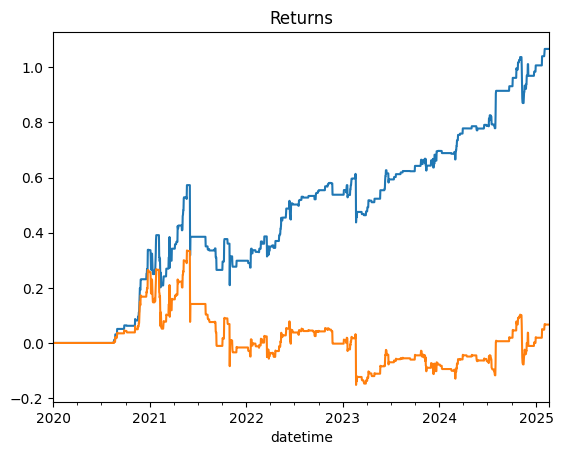

In [42]:
net_large_returns_ser_1d = get_net_return(large_holdings_df_from_price_1d, price_large_close_returns_1d)
sharpe_ratio_large_ser_1d = get_sharpe_ratio_data(net_large_returns_ser_1d)

(large_holdings_df_from_price_1d * price_large_close_returns_1d).sum(axis=1).cumsum().plot(title="Returns")
net_large_returns_ser_1d.cumsum().plot(title="Returns")
sharpe_ratio_large_ser_1d

Freq=1d, keep top 40 triples, key = MAX, z-score threshold = 3.0, secondary min corr = 0.6.

In [ ]:
price_large_close_returns_1d = (px_large_close_1d / px_large_close_1d.shift() - 1)

secondary_coin_min_corr = 0.6
tertiary_coin_max_corr = 0.6
rejection_max_corr = 0.5

z_score_min_threshold = 3.0
z_score_max_threshold = 10.0

min_data_points_to_transact = 5 * 2
num_triples_to_keep = 40
corr_selection_method = TopCorrSelectionMethod.MAX_CORR

large_holdings_df_from_price_1d = get_holdings_multiple_triples_df(
    price_large_close_returns_1d,
    look_back_min_periods,
    look_back_window_size,
    secondary_coin_min_corr,
    tertiary_coin_max_corr,
    rejection_max_corr,
    min_data_points_to_transact,
    z_score_min_threshold,
    z_score_max_threshold,
    corr_selection_method,
    num_triples_to_keep
)

total sr        -0.249271
in-sample sr    -0.102180
out-sample sr   -0.587867
dtype: float64

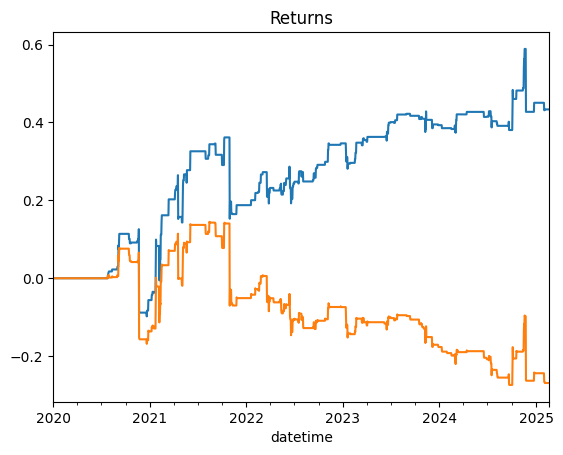

In [44]:
net_large_returns_ser_1d = get_net_return(large_holdings_df_from_price_1d, price_large_close_returns_1d)
sharpe_ratio_large_ser_1d = get_sharpe_ratio_data(net_large_returns_ser_1d)

(large_holdings_df_from_price_1d * price_large_close_returns_1d).sum(axis=1).cumsum().plot(title="Returns")
net_large_returns_ser_1d.cumsum().plot(title="Returns")
sharpe_ratio_large_ser_1d

Freq=1d, keep top 40 triples, key = MAX, z-score threshold = 3.0, secondary min corr = 0.7, rejection max corr = 0.4.

In [ ]:
price_large_close_returns_1d = (px_large_close_1d / px_large_close_1d.shift() - 1)

secondary_coin_min_corr = 0.7
tertiary_coin_max_corr = 0.6
rejection_max_corr = 0.4

z_score_min_threshold = 3.0
z_score_max_threshold = 10.0

min_data_points_to_transact = 5 * 2
num_triples_to_keep = 40
corr_selection_method = TopCorrSelectionMethod.MAX_CORR

large_holdings_df_from_price_1d = get_holdings_multiple_triples_df(
    price_large_close_returns_1d,
    look_back_min_periods,
    look_back_window_size,
    secondary_coin_min_corr,
    tertiary_coin_max_corr,
    rejection_max_corr,
    min_data_points_to_transact,
    z_score_min_threshold,
    z_score_max_threshold,
    corr_selection_method,
    num_triples_to_keep
)

total sr         0.566151
in-sample sr     0.190605
out-sample sr    1.211086
dtype: float64

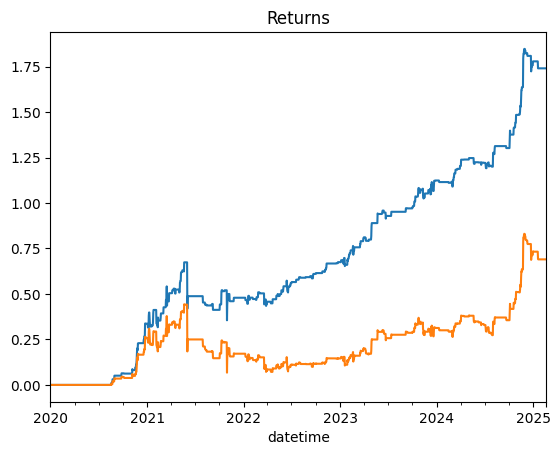

In [46]:
net_large_returns_ser_1d = get_net_return(large_holdings_df_from_price_1d, price_large_close_returns_1d)
sharpe_ratio_large_ser_1d = get_sharpe_ratio_data(net_large_returns_ser_1d)

(large_holdings_df_from_price_1d * price_large_close_returns_1d).sum(axis=1).cumsum().plot(title="Returns")
net_large_returns_ser_1d.cumsum().plot(title="Returns")
sharpe_ratio_large_ser_1d